<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/main/Avance1/Avance1.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199

# Análisis exploratorio de los datos

## Instalar librerias faltantes

**Nota de ejecución: Ejecutable en Google Colab, requiere un entorno con GPU.**

In [ ]:
! pip install chembl_webresource_client
! pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.6/582.6 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 47.2 MB/s eta 0:00:00


## Importar librerias

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
from google.colab import drive
import locale
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

**Compuestos inhibidores de la proteina VEFG**

* Pazopanib: Es un inhibidor multiquinasa con biodisponibilidad oral. Actúa sobre los tres tipos de receptores del factor de crecimiento vascular endotelial (VEGFR-1, VEGFR-2 y VEGFR-3),
* Sunitinib: Actúa bloqueando los receptores del factor de crecimiento derivado de plaquetas (PDGFRα y PDGFRβ), los receptores VEGF (VEGFR1, VEGFR2 y VEGFR3), el receptor de factor de células madre (KIT), la tirosin-quinasa 3 tipo Fms (FLT3), el factor estimulador de colonias (CSF-1R) y el receptor del factor de crecimiento epidérmico (EGFR).
* Bevacizumab: Al unirse al VEGF, bevacizumab inhibe su unión a los receptores Flt-1 (VEGFR-1) y KDR (VEGFR-2) presentes en la superficie de las células endoteliales.
* Sorafenib:  Inhibe varios receptores de factores de crecimiento, como las kinasas de tirosina. Algunos de estos receptores incluyen:
PDGFR-beta,VEGFR-2 (receptor 2 del factor de crecimiento endotelial vascular), VEGFR-3
* Regorafenib:  Afecta a múltiples quinasas, incluyendo aquellas involucradas en la angiogénesis, mientras que el VEGF 165 desempeña un papel crítico en la promoción de la formación de vasos sanguíneos.
* Cabozantinib: cabozantinib actúa como un inhibidor de VEGF y MET, lo que lo convierte en una opción terapéutica para ciertos tipos de cáncer.
* Lenvatinib: Se dirige selectivamente a la actividad quinasa de varios receptores, incluyendo los del factor de crecimiento del endotelio vascular (VEGF): VEGFR1 (FLT1), VEGFR2 (KDR) y VEGFR3 (FLT4).

# ChEMBL IDs



In [ ]:
# ChEMBL IDs
drugs_for_vegf_protein_ids = {
    'pazopanib': 'CHEMBL477772',
    'sunitinib': 'CHEMBL535',
    # 'bevacizumab': 'CHEMBL1201583',
    'sorafenib': 'CHEMBL1336',
    'regorafenib': 'CHEMBL1946170',
    'cabozantinib': 'CHEMBL2105717',
    'lenvatinib': 'CHEMBL1289601',
    'vandetanib': 'CHEMBL24828',
    'axitinib' :'CHEMBL1289926',
    'foretinib': 'CHEMBL1230609',
    'tivozanib': 'CHEMBL1289494',
    'dovitinib': 'CHEMBL522892',
    'orantinib': 'CHEMBL274654',
    'nintedanib': 'CHEMBL502835',
    'vatalanib': 'CHEMBL101253',
    'telatinib': 'CHEMBL2079588',
    'motesanib': 'CHEMBL572881',
    'brivanib': 'CHEMBL377300',
    'linifanib': 'CHEMBL223360',
    'regorafenib': 'CHEMBL1946170'}

**Nota de ejecución: Ejecutable en Google Colab, requiere un entorno con GPU.**

La ejecución de la siguiente celda, toma entre 15 a 18 minutos, dependiendo de los recursos.

In [ ]:

# Obtener información molecular
molecule = new_client.molecule
drugs_can_smiles = {}
for drug_name, drug_chembl in drugs_for_vegf_protein_ids.items():
    drugs_can_smiles.update({drug_name: molecule.get(drug_chembl).get('molecule_structures').get('canonical_smiles')})
    # Print out the results
    print(drug_name, ' > ', drugs_can_smiles[drug_name])

pazopanib  >  Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O
sunitinib  >  CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c1C
sorafenib  >  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1
regorafenib  >  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1
cabozantinib  >  COc1cc2nccc(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4)cc3)c2cc1OC
lenvatinib  >  COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O
vandetanib  >  COc1cc2/c(=N/c3ccc(Br)cc3F)nc[nH]c2cc1OCC1CCN(C)CC1
axitinib  >  CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1
foretinib  >  COc1cc2c(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4)cc3F)ccnc2cc1OCCCN1CCOCC1
tivozanib  >  COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c2cc1OC
dovitinib  >  CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5[nH]c4=O)[nH]c3c2)CC1
orantinib  >  Cc1[nH]c(/C=C2\C(=O)Nc3ccccc32)c(C)c1CCC(=O)O
nintedanib  >  COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O)CN2CCN(C)CC2)cc1)c1ccccc1
vatalanib  >  Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1
telatinib  >

# Inhibidores del receptor del factor de crecimiento endotelial vascular

In [ ]:
# Accede al atributo 'mechanism'
mechanism_client = new_client.mechanism

# Busca el ID del mecanismo "Vascular endothelial growth factor receptor inhibitor"
# Si no conoces el ID de antemano, puedes buscarlo filtrando por mecanismo de acción
mechanism_name = 'Vascular endothelial growth factor receptor inhibitor'
mechanism_info = mechanism_client.filter(mechanism_of_action=mechanism_name)


In [ ]:
# Obtener los compuestos ChMBL que son inhibidores
inhi_chmbl_ids = [mechanism_info[i]['molecule_chembl_id'] for i in range(len(mechanism_info))]

In [ ]:
# Obtener información molecular
molecule = new_client.molecule
drugs_can_smiles = {}
for drug_chembl in inhi_chmbl_ids:
    try:
      molecule_chembl = molecule.get(drug_chembl)
      molecule_structure = molecule_chembl.get('molecule_structures')
      molecule_canon_smiles = molecule_structure.get('canonical_smiles')
      molecule_name = molecule_structure.get('molfile').split('\n')[-1].lower()
      drugs_can_smiles.update({molecule_name: molecule_canon_smiles})
      # Print out the results
      print(molecule_name, ' > ', drugs_can_smiles[molecule_name])
    except:
      print(f'Compuesto {drug_chembl} no fue encontrado.')

sunitinib malate  >  CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c1C.O=C(O)C[C@H](O)C(=O)O
axitinib  >  CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1
vandetanib  >  COc1cc2/c(=N/c3ccc(Br)cc3F)nc[nH]c2cc1OCC1CCN(C)CC1
sorafenib tosylate  >  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1.Cc1ccc(S(=O)(=O)O)cc1
pazopanib hydrochloride  >  Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O.Cl
regorafenib  >  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1
nintedanib esylate  >  CCS(=O)(=O)O.COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O)CN2CCN(C)CC2)cc1)c1ccccc1
lenvatinib mesylate  >  COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O.CS(=O)(=O)O
su-014813  >  Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)NC[C@H](O)CN1CCOCC1
4sc-203  >  COc1ccc(C)cc1NC(=O)Nc1nc2ccc(Nc3ncnc4cc(OCCCN5CCN(C)CC5)c(OC)cc34)cc2s1
ilorasertib  >  Nc1ncc(-c2cnn(CCO)c2)c2scc(-c3ccc(NC(=O)Nc4cccc(F)c4)cc3)c12
cep-11981  >  CC(C)Cn1c2ccc(Nc3ncccn3)cc2c2c3c(c4c(c21)CCc1nn(C)cc1-4

## Buscar proteina target, en este caso VEGF165

In [ ]:
# Búsqueda de VEGF165 target
%load_ext cudf.pandas
target = new_client.target
target_query = target.search('Neuropilin-1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'O14786', 'xref_name': None, 'xre...",Homo sapiens,Neuropilin-1,21.0,False,CHEMBL5174,"[{'accession': 'O14786', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Rattus norvegicus,Neuropilin-1,21.0,False,CHEMBL3309098,"[{'accession': 'Q9QWJ9', 'component_descriptio...",SINGLE PROTEIN,10116.0
2,[],Homo sapiens,Neuropilin-2,17.0,False,CHEMBL4295667,"[{'accession': 'O60462', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,"[{'xref_id': 'P30411', 'xref_name': None, 'xre...",Homo sapiens,Bradykinin B2 receptor,8.0,False,CHEMBL3157,"[{'accession': 'P30411', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,"[{'xref_id': 'P13497', 'xref_name': None, 'xre...",Homo sapiens,Bone morphogenetic protein 1,8.0,False,CHEMBL3898,"[{'accession': 'P13497', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
3898,[],Mus musculus,Inhibitor of nuclear factor kappa-B kinase sub...,0.0,False,CHEMBL4296092,"[{'accession': 'Q60680', 'component_descriptio...",PROTEIN COMPLEX,10090.0
3899,[],Zika virus,Genome polyprotein,0.0,False,CHEMBL4523307,"[{'accession': 'Q32ZE1', 'component_descriptio...",SINGLE PROTEIN,64320.0
3900,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,0.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049.0
3901,[],Yellow fever virus (strain 17D vaccine) (YFV),Genome polyprotein,0.0,False,CHEMBL4523585,"[{'accession': 'P03314', 'component_descriptio...",SINGLE PROTEIN,11090.0


## Selecionar y recuperar los datos de bioactividad para la proteina VEGF165

In [ ]:
selected_target = 'CHEMBL5174'

In [ ]:
# Filtrar el dataset para solo tener la fila donde el target_chembl_id sea igual a CHEMBL5174
selected_target_row = targets[targets['target_chembl_id'] == selected_target]
selected_target_row

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'O14786', 'xref_name': None, 'xre...",Homo sapiens,Neuropilin-1,21.0,False,CHEMBL5174,"[{'accession': 'O14786', 'component_descriptio...",SINGLE PROTEIN,9606.0


Aqui vamos a recuperar los datos de bioactividad para la proteina VEGF165

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [ ]:
pd.set_option('display.max_columns', None)
# Guardar response como dataframe
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1747710,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '9.85', 'le': '0.18', 'lle': '-1.45', ...",CHEMBL212560,None,CHEMBL212560,4.10,0,http://www.openphacts.org/units/Nanomolar,548320,=,1,1,=,None,IC50,nM,None,79000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,79.0
1,None,None,1747711,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '10.90', 'le': '0.20', 'lle': '-0.82',...",CHEMBL386641,None,CHEMBL386641,4.38,0,http://www.openphacts.org/units/Nanomolar,548321,=,1,1,=,None,IC50,nM,None,42000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,42.0
2,None,None,1747712,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.42', 'le': '0.22', 'lle': '-1.36',...",CHEMBL425440,None,CHEMBL425440,4.10,0,http://www.openphacts.org/units/Nanomolar,548327,=,1,1,=,None,IC50,nM,None,80000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,80.0
3,None,None,1747713,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.92', 'le': '0.23', 'lle': '-0.28',...",CHEMBL436932,None,CHEMBL436932,4.21,0,http://www.openphacts.org/units/Nanomolar,548328,=,1,1,=,None,IC50,nM,None,62000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,62.0
4,None,None,1747714,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.35', 'le': '0.21', 'lle': '-2.27',...",CHEMBL213321,None,CHEMBL213321,4.22,0,http://www.openphacts.org/units/Nanomolar,548329,=,1,1,=,None,IC50,nM,None,60000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,60.0


In [ ]:
records_df = len(df)
print(f'Number of records in the dataset: {records_df}')

Number of records in the dataset: 139


## Descripción de columnas relevantes dentro del dataframe:

* Standard Value: Es la potencia de la droga, mientras menor sea el valor más eficaz es, debido a que un mayor significa que se requiere de una mayor cantidad de droga para tener el mismo efecto

In [ ]:
# Verificar que solo se cuente con registros de IC50
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
# Visualizar rango de valores de standard value
df.standard_value.unique()

array(['79000.0', '42000.0', '80000.0', '62000.0', '60000.0', '47000.0',
       '9000.0', '4000.0', '3000.0', '2000.0', '95000.0', '22000.0',
       '14000.0', '13000.0', '10000.0', '6000.0', '5000.0', '29000.0',
       '43000.0', '19000.0', '18000.0', '30000.0', '17000.0', '52000.0',
       '33000.0', '8000.0', '12000.0', '23000.0', '7000.0', '171000.0',
       '92000.0', '9300.0', '609.0', '1600.0', '800.0', '4600.0',
       '25118.86', '5400.0', '2900.0', '26000.0', '2951.21', '7762.47',
       '7700.0', '5370.32', None, '120000.0', '187000.0', '181000.0',
       '88000.0', '39000.0', '134000.0', '69000.0', '25000.0', '20900.0',
       '21300.0', '48600.0', '7200.0', '16000.0', '100000.0', '8900.0',
       '9200.0', '11700.0', '4300.0', '2300.0', '80500.0', '23400.0',
       '16100.0', '18100.0', '50100.0', '84100.0', '831763.77',
       '20892.96', '8912.51', '23442.29', '21379.62', '48977.88',
       '14125.38', '7244.36', '15848.93', '9332.54', '10715.19',
       '2884.03', '2238

# Guardar resultados en Google Drive

In [ ]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"
# Crear carpeta dentro de google drive llamada data
! mkdir '/content/drive/My Drive/Colab Notebooks/data'

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/data’: File exists


In [ ]:
# Subir el csv a la carpeta destino
df.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv', index=False)

In [ ]:
# Verificar que el archivo se encuentra en la carpeta destino
! ls -l '/content/drive/My Drive/Colab Notebooks/data'

total 311
-rw------- 1 root root 15554 May  6 00:42 bioactivity_data_2class_pIC50.csv
-rw------- 1 root root 74689 May  6 03:10 bioactivity_data.csv
-rw------- 1 root root 10382 May  6 00:42 bioactivity_data_curated.csv
-rw------- 1 root root  9354 May  6 00:42 bioactivity_data_preprocessed.csv
-rw------- 1 root root   120 May  6 00:42 mannwhitneyu_LogP.csv
-rw------- 1 root root   118 May  6 00:42 mannwhitneyu_MW.csv
-rw------- 1 root root   129 May  6 00:42 mannwhitneyu_NumHAcceptors.csv
-rw------- 1 root root   126 May  6 00:42 mannwhitneyu_NumHDonors.csv
-rw------- 1 root root   121 May  6 00:42 mannwhitneyu_pIC50.csv
-rw------- 1 root root 14327 May  6 00:42 plot_bioactivity_class.pdf
-rw------- 1 root root 14125 May  6 00:42 plot_ic50.pdf
-rw------- 1 root root 13693 May  6 00:42 plot_LogP.pdf
-rw------- 1 root root 13101 May  6 00:42 plot_MW.pdf
-rw------- 1 root root 25736 May  6 00:42 plot_MW_vs_LogP.pdf
-rw------- 1 root root 14872 May  6 00:42 plot_NumHAcceptors.pdf
-rw-----

Ver contenido de **bioactivity_data.csv**

In [ ]:
! head '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv'

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1747710,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,,,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,,,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '9.85', 'le': '0.18', 'lle': '-1.45', 'sei': '7.78'}",CHEMBL212560,,CHEMBL212560,4.10

## Manejo de valores faltantes
Dado que nos interesa conocer el standard value, los registros que no cuenten con esta información serán eliminados

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1747710,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '9.85', 'le': '0.18', 'lle': '-1.45', ...",CHEMBL212560,None,CHEMBL212560,4.10,0,http://www.openphacts.org/units/Nanomolar,548320,=,1,1,=,None,IC50,nM,None,79000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,79.0
1,None,None,1747711,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '10.90', 'le': '0.20', 'lle': '-0.82',...",CHEMBL386641,None,CHEMBL386641,4.38,0,http://www.openphacts.org/units/Nanomolar,548321,=,1,1,=,None,IC50,nM,None,42000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,42.0
2,None,None,1747712,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.42', 'le': '0.22', 'lle': '-1.36',...",CHEMBL425440,None,CHEMBL425440,4.10,0,http://www.openphacts.org/units/Nanomolar,548327,=,1,1,=,None,IC50,nM,None,80000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,80.0
3,None,None,1747713,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.92', 'le': '0.23', 'lle': '-0.28',...",CHEMBL436932,None,CHEMBL436932,4.21,0,http://www.openphacts.org/units/Nanomolar,548328,=,1,1,=,None,IC50,nM,None,62000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,62.0
4,None,None,1747714,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.35', 'le': '0.21', 'lle': '-2.27',...",CHEMBL213321,None,CHEMBL213321,4.22,0,http://www.openphacts.org/units/Nanomolar,548329,=,1,1,=,None,IC50,nM,None,60000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,None,None,20628397,[],CHEMBL4610306,Inhibition of recombinant human biotinylated V...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)NCCC[C@H](NC(=O)c1sccc1NS(=O)(=O)c1cccc2...,None,None,CHEMBL4609981,Bioorg Med Chem,2020,"{'bei': '9.96', 'le': '0.21', 'lle': '3.95', '...",CHEMBL1078974,None,CHEMBL1078974,4.96,0,http://www.openphacts.org/units/Nanomolar,3471124,=,1,1,=,None,IC50,nM,None,11100.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,12.7,11.1
135,None,None,20628398,[],CHEMBL4610306,Inhibition of recombinant human biotinylated V...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCc1nnc(NC(=O)CS

In [ ]:
records_df2 = len(df2)
preserved_info = round((records_df2/records_df)*100,2)
print(f'Number of records in df2 {records_df2}, percentage of information preserved: {preserved_info}')

Number of records in df2 131, percentage of information preserved: 94.24


In [ ]:
# Verificar la cantidad de registros de canonical smiles
canon_smiles_count = sum(df2.canonical_smiles.notnull())
canon_smiles_count

131

In [ ]:
# Verificar que la columna canonical_smiles cuente con valores unicos
unique_canon_smiles_count = len(df2.canonical_smiles.unique())
percentage_unique_canon_smiles = round(unique_canon_smiles_count/canon_smiles_count*100,2)
print(f'Number of unique canonical_smiles records in df2: {unique_canon_smiles_count}, percentage of unique records: {percentage_unique_canon_smiles}')

Number of unique canonical_smiles records in df2: 98, percentage of unique records: 74.81


### Eliminar canonical_smiles duplicadas

Una vez que notamos el porcentaje de entradas unicas, procedemos a eliminar los duplicados de la columna **canonical_smiles**

In [ ]:
df2_unique_can_smiles = df2.drop_duplicates(['canonical_smiles'])
df2_unique_can_smiles

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1747710,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '9.85', 'le': '0.18', 'lle': '-1.45', ...",CHEMBL212560,None,CHEMBL212560,4.10,0,http://www.openphacts.org/units/Nanomolar,548320,=,1,1,=,None,IC50,nM,None,79000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,79.0
1,None,None,1747711,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '10.90', 'le': '0.20', 'lle': '-0.82',...",CHEMBL386641,None,CHEMBL386641,4.38,0,http://www.openphacts.org/units/Nanomolar,548321,=,1,1,=,None,IC50,nM,None,42000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,42.0
2,None,None,1747712,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.42', 'le': '0.22', 'lle': '-1.36',...",CHEMBL425440,None,CHEMBL425440,4.10,0,http://www.openphacts.org/units/Nanomolar,548327,=,1,1,=,None,IC50,nM,None,80000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,80.0
3,None,None,1747713,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.92', 'le': '0.23', 'lle': '-0.28',...",CHEMBL436932,None,CHEMBL436932,4.21,0,http://www.openphacts.org/units/Nanomolar,548328,=,1,1,=,None,IC50,nM,None,62000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,62.0
4,None,None,1747714,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,None,None,CHEMBL1146846,Bioorg Med Chem Lett,2006,"{'bei': '11.35', 'le': '0.21', 'lle': '-2.27',...",CHEMBL213321,None,CHEMBL213321,4.22,0,http://www.openphacts.org/units/Nanomolar,548329,=,1,1,=,None,IC50,nM,None,60000.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,None,None,19481290,[],CHEMBL4480618,Inhibition of human biotinylated VEGF-A165 bin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,None,None,CHEMBL4480373,Medchemcomm,2019,"{'bei': '6.24', 'le': '0.12', 'lle': '6.82', '...",CHEMBL4515173,None,CHEMBL4515173,4.30,0,http://www.openphacts.org/units/Nanomolar,3257738,=,1,1,=,None,IC50,nM,None,50100.0,CHEMBL5174,Homo sapiens,Neuropilin-1,9606,None,None,IC50,uM,UO_0000065,None,50.1
135,None,None,20628398,[],CHEMBL4610306,Inhibition of recombinant human biotinylated V...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCc1nnc(NC(=O)CS

## Preprocesamiento de datos de bioactividad

### Análisis de correlación cuantitativos y gráficos

Análisis de correlación de variables numéricas a través del método de **Pearson**

Para ello observamos el número de columnas que tenemos y notamos de qué tipo son cada una:

In [ ]:
# Las siguientes columnas deben ser consideradas flotantes
df2_unique_can_smiles = df2_unique_can_smiles.astype({'pchembl_value': 'float64', 'standard_value': 'float64', 'value': 'float64'})

In [ ]:
# Un breve conteo de Nulos
# Esto nos ayudará para la ingeniería de datos
null_counts = df2_unique_can_smiles.isnull().sum()
print(null_counts)

action_type                  98
activity_comment             98
activity_id                   0
activity_properties           0
assay_chembl_id               0
assay_description             0
assay_type                    0
assay_variant_accession      98
assay_variant_mutation       98
bao_endpoint                  0
bao_format                    0
bao_label                     0
canonical_smiles              0
data_validity_comment        93
data_validity_description    93
document_chembl_id            0
document_journal              0
document_year                 0
ligand_efficiency             7
molecule_chembl_id            0
molecule_pref_name           98
parent_molecule_chembl_id     0
pchembl_value                 7
potential_duplicate           0
qudt_units                    0
record_id                     0
relation                      0
src_id                        0
standard_flag                 0
standard_relation             0
standard_text_value          98
standard

In [ ]:
# Desplegar el total de columnas del DF
columns_names = df2_unique_can_smiles.columns.values
columns_names

array(['action_type', 'activity_comment', 'activity_id',
       'activity_properties', 'assay_chembl_id', 'assay_description',
       'assay_type', 'assay_variant_accession', 'assay_variant_mutation',
       'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles',
       'data_validity_comment', 'data_validity_description',
       'document_chembl_id', 'document_journal', 'document_year',
       'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name',
       'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation',
       'src_id', 'standard_flag', 'standard_relation',
       'standard_text_value', 'standard_type', 'standard_units',
       'standard_upper_value', 'standard_value', 'target_chembl_id',
       'target_organism', 'target_pref_name', 'target_tax_id',
       'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value',
       'value'], dtype=object)

In [ ]:
df2_unique_can_smiles.dtypes

action_type                   object
activity_comment              object
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession       object
assay_variant_mutation        object
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                  int64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name            object
parent_molecule_chembl_id     object
pchembl_value                float64
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
s

In [ ]:
# De las anteriores columnas, necesitamos aquellas numericas para la matriz de
# Correlacion, pero los Identificadores no aportan ningún tipo de relación
# Por ello los eliminaremos del DataFrame
correlation_matrix_columns = df2_unique_can_smiles.drop(columns=['activity_id','potential_duplicate','record_id','src_id','standard_flag'])

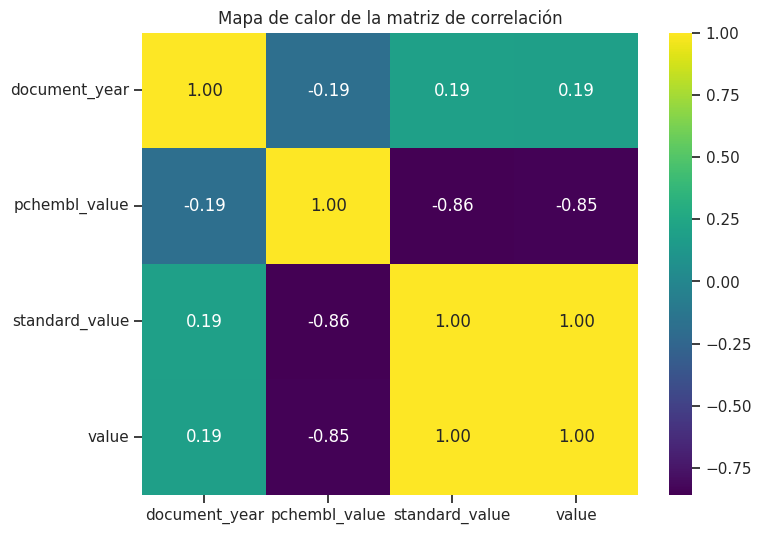

In [ ]:
# Calcular la matriz de correlación
# Agregando parametro de que solo se aplique a valores numéricos
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='pearson')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **Spearman**

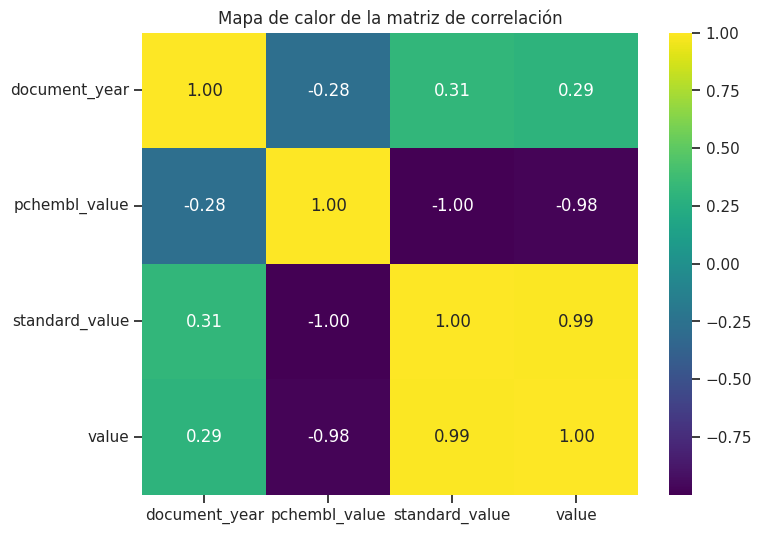

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='spearman')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **kendall**

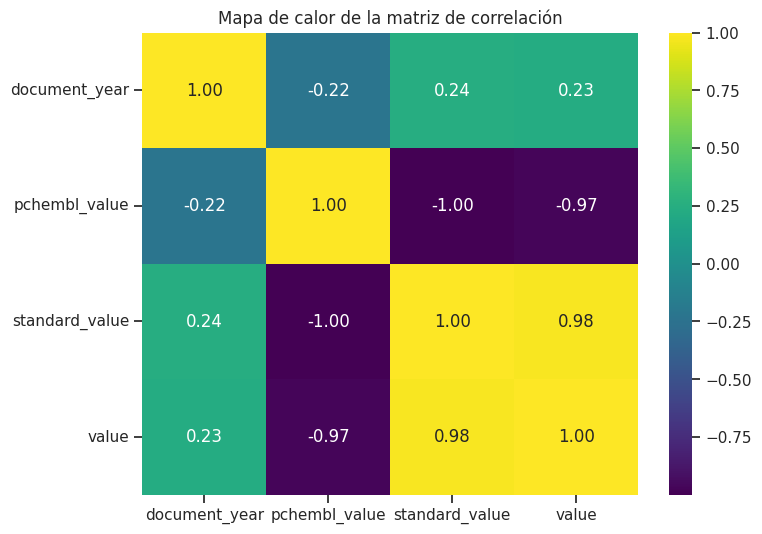

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='kendall')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

A modo de **conclusión**, podemos ver que las únicas columnas numéricas están asociadas a años, e identificadores. Estos datos no son de alta importancia para nuestro modelo de IA. La justificación y selección de columnas se detalla a continuación.

### Combinar 3 columnas (molecule_chembl_id,canonical_smiles,standard_value) y bioactivity_class en un DataFrame

* **molecule_chembl_id**: Esta columna contiene identificadores únicos para las moléculas en el conjunto de datos. Es crucial si estás trabajando con un conjunto de datos que involucra múltiples moléculas y necesitas distinguirlas y realizar operaciones específicas basadas en su identificación.

* **canonical_smiles**: El SMILES canónico es una representación única y estandarizada de la estructura química de una molécula. Esta columna es importante cuando se realizan análisis químicos o comparacion de estructuras moleculares entre diferentes moléculas dentro del conjunto de datos.

* **standard_value**: Esta columna contiene valores numéricos que representan medidas estándar asociadas con las moléculas, como la actividad biológica de un compuesto (por ejemplo, la concentración inhibidora 50 (IC50) en ensayos biológicos). Es una columna crucial si estás interesado en analizar la actividad biológica de las moléculas o realizar comparaciones cuantitativas entre ellas.

Al seleccionar estas columnas específicas, estamos enfocando tu análisis en la identificación de las moléculas, sus estructuras químicas y las medidas estándar asociadas con su actividad biológica.

La Bioactividad será calculada/etiquetada en los siguientes pasos a través de un umbral.

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_unique_can_smiles[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,79000.0
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,42000.0
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,80000.0
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,62000.0
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,60000.0
...,...,...,...
112,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,50100.0
135,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,41100.0
136,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,19100.0
137,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,41700.0


Guardar resultados en un archivo CSV

In [ ]:
# Subir el csv a la carpeta destino
df3.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv', index=False)

In [ ]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv  mannwhitneyu_NumHAcceptors.csv  plot_MW.pdf
bioactivity_data.csv		   mannwhitneyu_NumHDonors.csv	   plot_MW_vs_LogP.pdf
bioactivity_data_curated.csv	   mannwhitneyu_pIC50.csv	   plot_NumHAcceptors.pdf
bioactivity_data_preprocessed.csv  plot_bioactivity_class.pdf	   plot_NumHDonors.pdf
mannwhitneyu_LogP.csv		   plot_ic50.pdf		   results.zip
mannwhitneyu_MW.csv		   plot_LogP.pdf


### Etiquetado de componentes
Los datos de bioactividad estan en la unidad IC50. Compuestos con menos de 1000 nM será considerados como **activos** mientras aquellos que sean mayores a 10,000 nM serán considerados como **inactivos**. Todos los valores que caen dentro de 1,000 y 10,000 nM serán clasificados como **intermedios**.

In [ ]:
# Leer csv con datos preprocesados
df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
# Concatenar lista generada como una serie de pandas y agregarla al df
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,79000.0,inactive
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,42000.0,inactive
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,80000.0,inactive
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,62000.0,inactive
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,60000.0,inactive
...,...,...,...,...
93,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,50100.0,inactive
94,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,41100.0,inactive
95,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,19100.0,inactive
96,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,41700.0,inactive


Guardad dataframe como archivo csv

In [ ]:
# Subir el csv a la carpeta destino
df5.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv', index=False)

## Cargar datos de bioactividad

In [ ]:
# Leer el archivo con los datos curados
df6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv')
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,79000.0,inactive
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,42000.0,inactive
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,80000.0,inactive
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,62000.0,inactive
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,60000.0,inactive
...,...,...,...,...
93,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,50100.0,inactive
94,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,41100.0,inactive
95,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,19100.0,inactive
96,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,41700.0,inactive


## Calcular descriptores Lipinski

### Regla de Lipinski


La regla de Lipinski establece los siguientes criterios para evaluar la idoneidad de una molécula como candidato a fármaco:

1. **Peso molecular (MW):** MW < 500
2. **LogP (coeficiente de partición octanol-agua):** LogP < 5
3. **Número de donantes de hidrógeno (HBD):** HBD < 5
4. **Número de aceptores de hidrógeno (HBA):** HBA < 10



In [ ]:
def lipinski(smiles, verbose=False):

  moldata = []
  for element in smiles:
    mol = Chem.MolFromSmiles(element)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumAcceptors])

    if i==0:
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columNames = ['MW','LogP','NumHDonors','NumHAcceptors']
  descriptors = pd.DataFrame(data=baseData, columns = columNames)

  return descriptors

In [ ]:
df_lipinski = lipinski(df6.canonical_smiles)

## Combinar DataFrames

In [ ]:
# Visualizar el dataframe con los descriptores calculados
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,416.569,5.55308,1.0,5.0
1,401.558,5.19608,2.0,5.0
2,358.832,5.45718,2.0,4.0
3,352.869,4.49498,1.0,4.0
4,371.871,6.49182,1.0,3.0
...,...,...,...,...
93,688.835,-2.51836,12.0,9.0
94,436.566,4.38742,1.0,8.0
95,450.593,4.69584,1.0,8.0
96,452.565,4.09302,2.0,9.0


In [ ]:
combined_df = pd.concat([df6, df_lipinski], axis=1)
combined_df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,79000.0,inactive,416.569,5.55308,1.0,5.0
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,42000.0,inactive,401.558,5.19608,2.0,5.0
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,80000.0,inactive,358.832,5.45718,2.0,4.0
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,62000.0,inactive,352.869,4.49498,1.0,4.0
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,60000.0,inactive,371.871,6.49182,1.0,3.0
...,...,...,...,...,...,...,...,...
93,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,50100.0,inactive,688.835,-2.51836,12.0,9.0
94,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,41100.0,inactive,436.566,4.38742,1.0,8.0
95,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,19100.0,inactive,450.593,4.69584,1.0,8.0
96,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,41700.0,inactive,452.565,4.09302,2.0,9.0


## Convertir IC50 a pIC50

Para contar con datos más uniformes, se convirtió **IC50** a su escala logaritmica negativa, lo cual esencialemnte es ${-\log_{10}(IC_{50})}$

Se definió una función **pIC50** la cual aceptará un dataframe como entrada y hará lo siguiente:

* Tomar los valores de IC50 de la columna **standard_value** y los convertirá de nM a M mediante la multiplicación del valor por ${10^{-9}}$.
* Tomar el valor molar y aplicar ${-\log_{10}}$
* Borrar la columna de **standard_value** y crear una nueva columna llamada **pIC50**.

In [ ]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Convierte nM a M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns='standard_value_norm')

  return x

Los valores mayores a 100,000,000 se quedarán en 100,000,000, de no hacerlo así los valores logaritmicos negativos se convertirán en negativos.

In [ ]:
combined_df.standard_value.describe()

count        98.000000
mean      29928.472755
std       39451.145929
min         609.000000
25%        5550.000000
50%       14000.000000
75%       37750.000000
max      187000.000000
Name: standard_value, dtype: float64

En este caso no es necesario pero se debe implementar esa lógica para evitar cualquier tipo de problema en el futuro.

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns='standard_value')

    return x

Primero aplicaremos la función **norm_value** para que los valores dentro de la columna **standard_value** sean normalizados.

In [ ]:
df_norm = norm_value(combined_df)

El siguiente paso es convertir la columna IC50 a pIC50

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,inactive,416.569,5.55308,1.0,5.0,4.102373
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,inactive,401.558,5.19608,2.0,5.0,4.376751
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,inactive,358.832,5.45718,2.0,4.0,4.096910
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,inactive,352.869,4.49498,1.0,4.0,4.207608
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,inactive,371.871,6.49182,1.0,3.0,4.221849
...,...,...,...,...,...,...,...,...
93,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,inactive,688.835,-2.51836,12.0,9.0,4.300162
94,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,inactive,436.566,4.38742,1.0,8.0,4.386158
95,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,inactive,450.593,4.69584,1.0,8.0,4.718967
96,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,inactive,452.565,4.09302,2.0,9.0,4.379864


In [ ]:
df_final.pIC50.describe()

count    98.000000
mean      4.846317
std       0.555514
min       3.728158
25%       4.423832
50%       4.853872
75%       5.256167
max       6.215383
Name: pIC50, dtype: float64

## Eliminar la clase bioactiva intermedia

Cuando eliminamos una clase bioactiva intermedia durante el análisis de datos del CHEMBL para la proteína VEGF165, estamos simplificando el análisis, enfoncanonos en resultados relevantes, optimizamos recursos y mejoramos la precisión de los resultados obtenidos.

In [ ]:
df_2classes = df_final[df_final['class'] != 'intermediate']
df_2classes

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL212560,CN(C)CCCOc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,inactive,416.569,5.55308,1.0,5.0,4.102373
1,CHEMBL386641,CN(C)CCNc1cccc2c(C#N)c(-c3ccccc3)c(NC3CCCCC3)n12,inactive,401.558,5.19608,2.0,5.0,4.376751
2,CHEMBL425440,N#Cc1c(-c2ccccc2)c(Nc2cccc(N)c2)n2c(Cl)cccc12,inactive,358.832,5.45718,2.0,4.0,4.096910
3,CHEMBL436932,CN(C)CCCNc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,inactive,352.869,4.49498,1.0,4.0,4.207608
4,CHEMBL213321,Cc1cccc(C)c1Nc1c(-c2ccccc2)c(C#N)c2cccc(Cl)n12,inactive,371.871,6.49182,1.0,3.0,4.221849
...,...,...,...,...,...,...,...,...
93,CHEMBL4515173,C[C@H](NC(=O)[C@@H]1Cc2ccccc2CN1C(=O)[C@@H](N)...,inactive,688.835,-2.51836,12.0,9.0,4.300162
94,CHEMBL4646334,CCc1nnc(NC(=O)CSc2nnc(-c3ccccc3)n2-c2cccc(C)c2)s1,inactive,436.566,4.38742,1.0,8.0,4.386158
95,CHEMBL4643884,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(C)cc3)n2-c2cccc(C...,inactive,450.593,4.69584,1.0,8.0,4.718967
96,CHEMBL4637483,CCc1nnc(NC(=O)CSc2nnc(-c3ccc(O)cc3)n2-c2cccc(C...,inactive,452.565,4.09302,2.0,9.0,4.379864


# **Descripción de columnas de Dataset Final**

**Molecule ChEMBL ID:** (Categórica) Identificador único asignado a cada molécula en la base de datos ChEMBL. Proporciona un identificador único para referenciar la molécula en la base de datos.

**Canonical SMILES:** (Categórica) Una representación simplificada de la estructura química de la molécula en forma de cadena de texto. Permite la comparación y el análisis de la estructura química de la molécula.

**Class:** (Categórica) Esta columna puede indicar alguna clasificación o categorización específica de la molécula.


*   Un compuesto se clasifica como "active" cuando demuestra una interacción notable con el objetivo biológico de interés y produce un efecto biológico deseado, como la inhibición de una enzima o la modulación de una vía biológica.
La actividad biológica puede ser medida en términos de su capacidad para modificar la función de un objetivo biológico, como un receptor o una enzima, y se cuantifica mediante parámetros como la concentración inhibitoria media (IC50), la constante de inhibición (Ki), entre otros.
*   Un compuesto se clasifica como "inactive" cuando no interactúa de manera sustancial con el objetivo biológico de interés o cuando su interacción no produce un efecto biológico observable o relevante.



**Molecular Weight (MW):** (Numérica) El peso molecular del compuesto, que es la masa total de todas las partículas en una molécula dada. Se expresa en unidades de masa atómica (u).

**LogP:** (Numérica) El coeficiente de partición octanol-agua (LogP) es una medida de la lipofilicidad de una molécula, lo que indica su afinidad por los solventes orgánicos (octanol) en comparación con los solventes acuosos (agua).

**NumHDonors:** (Numérica) El número de donadores de hidrógeno en la molécula, que son átomos de hidrógeno unidos a un átomo electronegativo (como oxígeno o nitrógeno) y que pueden actuar como donadores de protones en enlaces de hidrógeno.

**NumHAcceptors:** (Numérica) El número de aceptores de hidrógeno en la molécula, que son átomos electronegativos (como oxígeno o nitrógeno) capaces de aceptar pares de electrones adicionales y formar enlaces de hidrógeno.

**pIC50:** (Numérica) Es el valor negativo del logaritmo en base 10 de la concentración inhibitoria media (IC50) de un compuesto, expresado en mol / L. Es comúnmente utilizado en la actividad de inhibición de fármacos, donde valores más altos de pIC50 indican una mayor actividad inhibitoria.

In [ ]:
# Guardar dataframe en archivo csv
df_final.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv', index=False)

## Análisis exploratorio de los datos (Análisis del Espacio Químico) mediante descriptores Lipinski

### Distribución de las dos clases de bioactividad

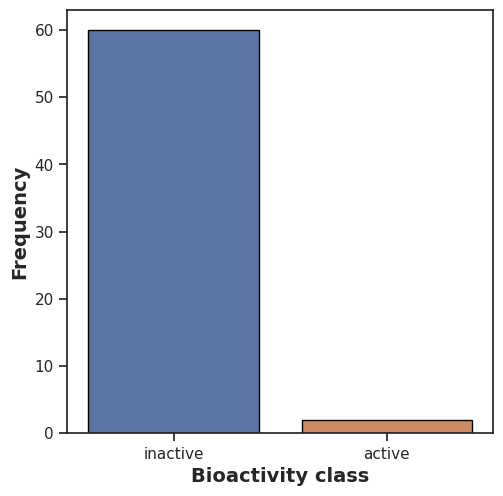

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2classes, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf')

### Gráfica de dispersión

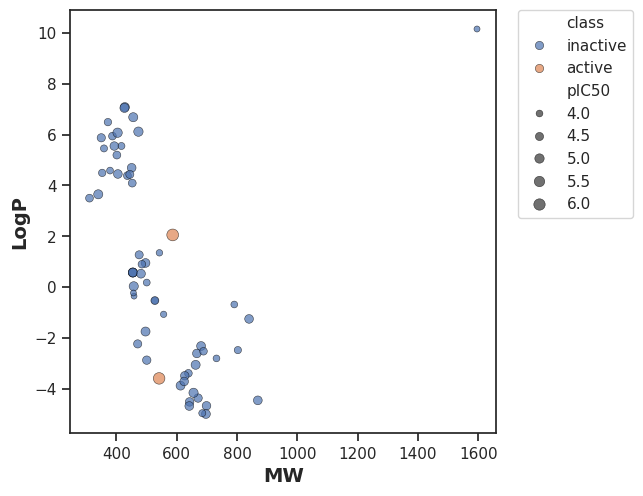

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf')

### Diagrama de caja
#### Valor de pIC50

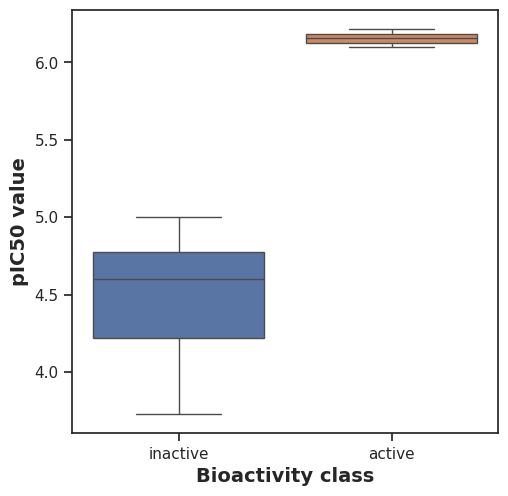

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf')

##### Análisis estadístico
**Prueba U Mann-Whitney**


In [ ]:
def mannwhitney(descriptor, verbose=False):

  # Generador de semilla aleatoria
    seed(1)

  # Activos e inactivos
    selection = [descriptor, 'class']
    df = df_2classes[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2classes[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

  # Comparar muestras
    stat, p = mannwhitneyu(active, inactive)

  # Interpretar
    alpha = 0.05
    if p > alpha:
      interpretation = 'Same distribution (fail to reject H0)'
    else:
      interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(f'/content/drive/My Drive/Colab Notebooks/data/{filename}')

    return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,120.0,0.017719,0.05,Different distribution (reject H0)


#### MW

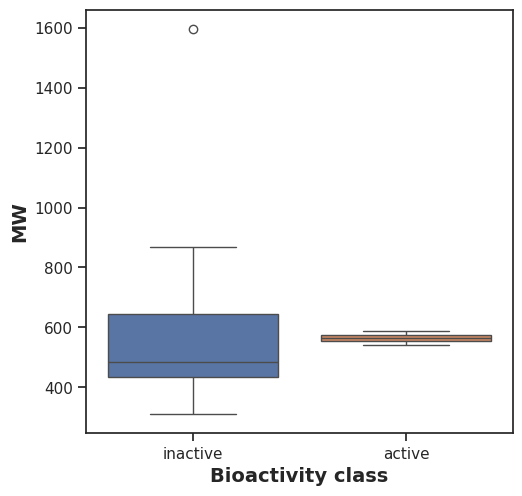

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,76.0,0.536856,0.05,Same distribution (fail to reject H0)


#### LogP

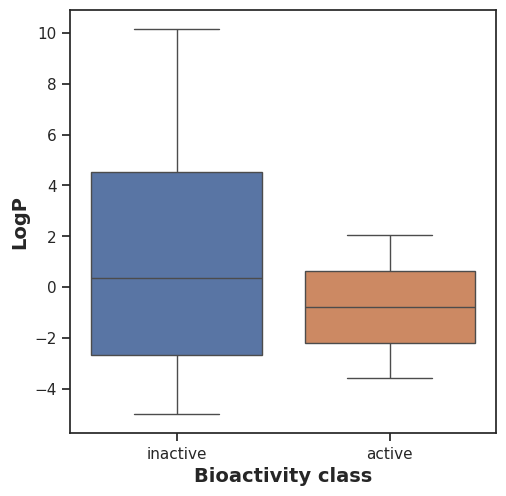

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,48.0,0.646809,0.05,Same distribution (fail to reject H0)


#### NumHDonors

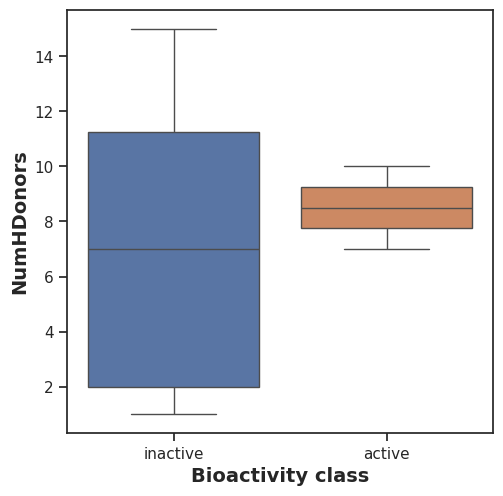

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,73.0,0.615769,0.05,Same distribution (fail to reject H0)


#### NumHAcceptors

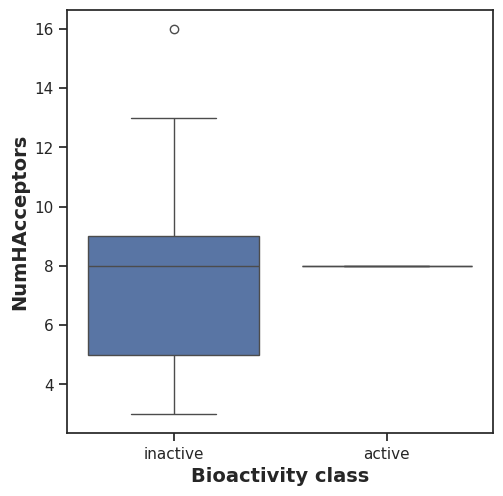

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,63.0,0.91994,0.05,Same distribution (fail to reject H0)


#### Guardar en un archivo comprimido los archivos generados

In [ ]:
# Guardar archivos en un archivo zip
!zip -r /content/drive/My\ Drive/Colab\ Notebooks/data/results.zip /content/drive/My\ Drive/Colab\ Notebooks/data/*.pdf /content/drive/My\ Drive/Colab\ Notebooks/data/*.csv

updating: content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf (deflated 19%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv (deflated 77%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv (deflated 90%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv (deflated 83%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv (deflate

In [ ]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv  mannwhitneyu_NumHAcceptors.csv  plot_MW.pdf
bioactivity_data.csv		   mannwhitneyu_NumHDonors.csv	   plot_MW_vs_LogP.pdf
bioactivity_data_curated.csv	   mannwhitneyu_pIC50.csv	   plot_NumHAcceptors.pdf
bioactivity_data_preprocessed.csv  plot_bioactivity_class.pdf	   plot_NumHDonors.pdf
mannwhitneyu_LogP.csv		   plot_ic50.pdf		   results.zip
mannwhitneyu_MW.csv		   plot_LogP.pdf


## Conclusion de EDA - Exploratory Data Analysis

En este estudio de exploración de datos (EDA) sobre la bioactividad de moléculas asociadas a la inhibición de la proteína VEGF165, se ha realizado un análisis exhaustivo de los datos recopilados de CHEMBL. Nuestro objetivo principal fue comprender la relación entre la estructura química de las moléculas y su actividad biológica, específicamente su capacidad para inhibir la proteína VEGF165.

Durante el proceso de EDA, se llevaron a cabo diversas etapas, incluyendo la conversión de datos, el análisis estadístico descriptivo, la visualización de distribuciones y relaciones, y la identificación de tendencias y patrones significativos. A través de estas técnicas, se pudieron obtener insights valiosos que contribuyen a nuestra comprensión de la bioactividad de estas moléculas.

Entre los hallazgos más destacados se encuentra la identificación de características estructurales comunes entre las moléculas con alta actividad inhibitoria de VEGF165, lo cual sugiere posibles áreas de enfoque para el diseño de moléculas más efectivas en futuras investigaciones. Además, se observaron correlaciones interesantes entre ciertos descriptores químicos y la actividad biológica, lo que podría orientar estrategias de optimización de moléculas.

En conclusión, este análisis exploratorio proporciona una base sólida para proceder a realizar un proceso de Ingeniería de datos, destacando la importancia del análisis de datos en la comprensión de la actividad biológica de moléculas y su potencial impacto en el desarrollo de tratamientos farmacológicos más efectivos.

## Referencias

1. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 1 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=icf489K1hWc

2. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 2 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=qWVTxfLq2ak

3. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 3 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=zD2focOkQ48


